---------- Data original ----------
     Position  Starting Grid
0           1              2
1           2              1
2           3              4
3           4              3
4           5              5
..        ...            ...
367        15             15
368        16             16
369        17             18
370        18             11
371        19             19

[372 rows x 2 columns]


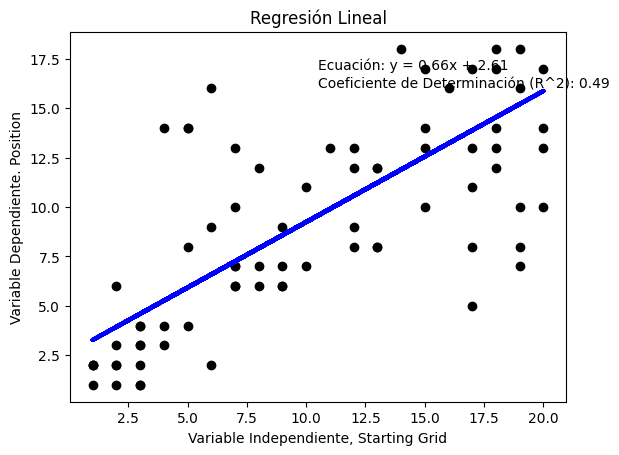

---------- Data a predecir ----------
    Starting Grid
0               1
1               2
2               3
3               4
4               5
5               6
6               7
7               8
8               9
9              10
10             11
11             12
12             13
13             14
14             15
15             16
16             17
---------- Data con predicciones ----------
    Starting Grid  Final position prediction
0               1                   3.271594
1               2                   3.934932
2               3                   4.598270
3               4                   5.261608
4               5                   5.924946
5               6                   6.588284
6               7                   7.251622
7               8                   7.914960
8               9                   8.578299
9              10                   9.241637
10             11                   9.904975
11             12                  10.568313
12       

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Cargar el archivo CSV a la variable data
file_path1 = 'csvs_f1_limpios/f1_data_limpia_2019.csv'
data = pd.read_csv(file_path1)
print("---------- Data original ----------")
print(data)

X = data[['Starting Grid']]
y = data['Position']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

# Mostrar la ecuación de la regresión lineal y el coeficiente de determinación R^2
ecuacion = f'Ecuación: y = {modelo.coef_[0]:.2f}x + {modelo.intercept_:.2f}'
r2 = f'Coeficiente de Determinación (R^2): {modelo.score(X_test, y_test):.2f}'

plt.text(0.5, 0.9, ecuacion, fontsize=10, transform=plt.gca().transAxes)
plt.text(0.5, 0.85, r2, fontsize=10, transform=plt.gca().transAxes)

plt.xlabel('Variable Independiente, Starting Grid')
plt.ylabel('Variable Dependiente. Position')
plt.title('Regresión Lineal')
plt.show()

file_path2 = 'datos_a_predecir.csv'
dataAPredecir = pd.read_csv(file_path2)
print("---------- Data a predecir ----------")
print(dataAPredecir)

pre = dataAPredecir[['Starting Grid']]

y_pred = modelo.predict(pre)

# Agregar una nueva columna llamada 'Final position prediction' con los nuevos valores
pre['Final position prediction'] = y_pred
print("---------- Data con predicciones ----------")
print(pre)

pre.to_csv('f1_datos_predecidos.csv', index=False)